In [80]:
%config InlineBackend.figure_formats = ['retina']

## Usefull methods & libraries  

In [81]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential

# I - Exploration of the Dataset 

In [82]:
data = pd.read_csv('./data/SeoulBikeData.csv', encoding='latin1')

In [83]:
data.Date = pd.to_datetime(data.Date, dayfirst=True)

## Dimension reduction 

- Conversion of functionning days from 'Yes' and 'No' to 0 and 1
- Conversion of the seasons from String to integers between 0 and 3

In [84]:
data['Functioning Day'] = (data['Functioning Day']=='Yes').astype(int)

In [85]:
data['Holiday'] = (data['Holiday']=='Holiday').astype(int)

In [86]:
data = data.replace({'Seasons': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}})

In [87]:
data = data.set_index(data.Date).drop('Date', axis=1)

In [88]:
print(' nb of occurence :  {} \n nb of features : {}'.format(np.shape(data)[0], np.shape(data)[1]))
data

 nb of occurence :  8760 
 nb of features : 13


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1


In [89]:
data.corr('pearson')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.544659e-15,-1.391486e-16,0.005439
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,-0.026000
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,0.032089


> Il serait peut être pertinent certaines features si celles ci sont très corrélées avec des features déjà présentes, par exemple :
>>  Dew point temperature & Temperature 

Intérêt d'enlever certaines features très corrélées : 
- interpretabilité 
- rapidité du modèle 

## Creation of train and testing sets 

In [90]:
X, y = data.drop('Rented Bike Count', axis=1), data['Rented Bike Count']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [92]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Liste utilisée pour comparer les performances des méthodes 
performance_list = []

# II - Search of the best predictive model

## SVR

Support Vector Regression is the first method that we tried as its role is to solve discrimination problems. In our case we had to predict the number of bikes rented (so more classes than only 0 and 1), so this method didn't provide really good results.
Moreover we took the regularization parameter C large so the strengh of the regularization wasn't small (because the strengh if inversely proportional to C).

In [93]:
regr = SVR(C=100)
regr.fit(x_train, y_train)

SVR(C=100)

In [94]:
performance_list.append(['SVR', regr.score(x_train, y_train), regr.score(x_test, y_test)])
regr.score(x_train, y_train), regr.score(x_test, y_test)

(0.732905371384871, 0.7203680592051755)

In [95]:
y_pred_svr = regr.predict(x_test)

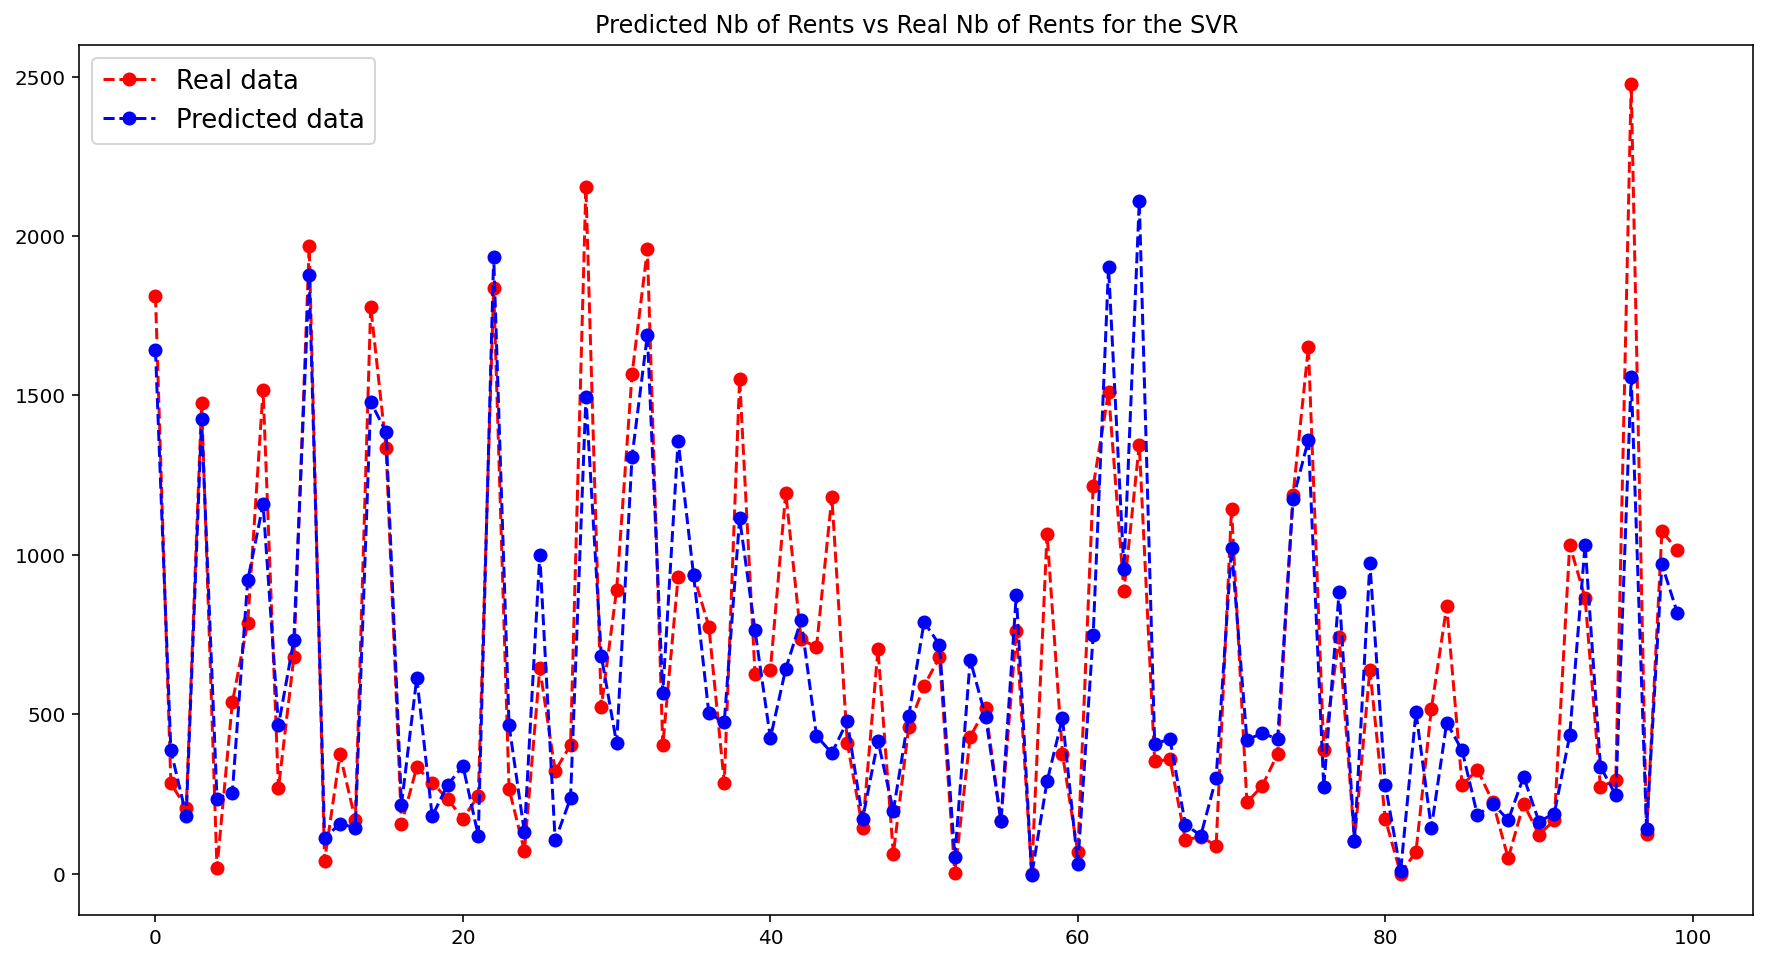

In [96]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_svr[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.title('Predicted Nb of Rents vs Real Nb of Rents for the SVR')
plt.legend(fontsize=13)
plt.show()

# Lasso

The Lasso is the second technique we used and which gave us the worse results.
This poor results can be explained by the classical limitation of the Lasso : 
- The most import one :  the high dimension i.e. the number of features was way under the number of samples to test. 
- maybe in a more marginal way : some correlation between the variables (see the correlation matrix above) for example between Dew Point Temperature and Temperature.

In [97]:
lasso = Lasso(alpha=0.1, max_iter=5000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=5000)

In [128]:
lasso_score_train, lasso_score_test = lasso.score(x_train, y_train), lasso.score(x_test, y_test)
performance_list.append(['Lasso', lasso_score_train, lasso_score_test])
print('Training score : {} \nTesting Score : {}'.format(lasso_score_train,lasso_score_test))

Training score : 0.5477061139687648 
Testing Score : 0.5374454449646758


In [99]:
y_pred_lasso = lasso.predict(x_test)

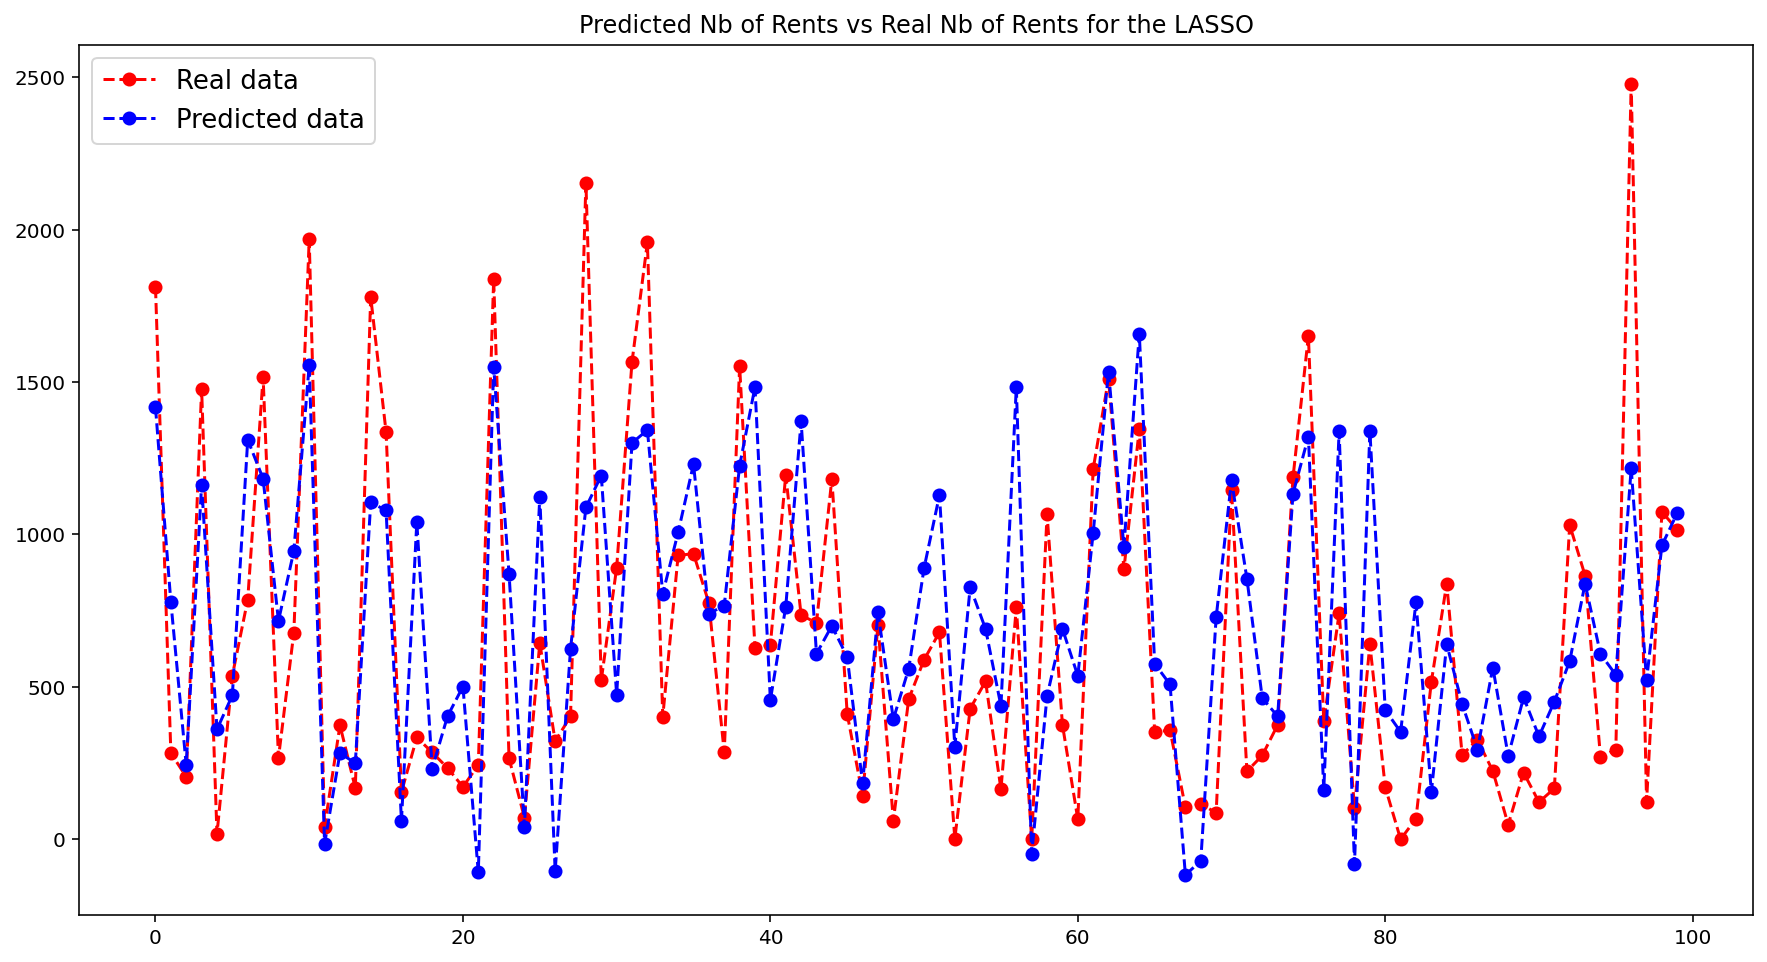

In [100]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_lasso[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.title('Predicted Nb of Rents vs Real Nb of Rents for the LASSO')
plt.legend(fontsize=13)
plt.show()

# Ridge

In [101]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [129]:
ridge_train_score, ridge_test_score = ridge.score(x_train, y_train), ridge.score(x_test, y_test)
performance_list.append(['Ridge', ridge_train_score, ridge_test_score])
print('Training score : {} \nTesting Score : {}'.format(ridge_train_score,ridge_test_score))

Training score : 0.5477076101640762 
Testing Score : 0.5374636941897528


In [103]:
y_pred_ridge = ridge.predict(x_test)

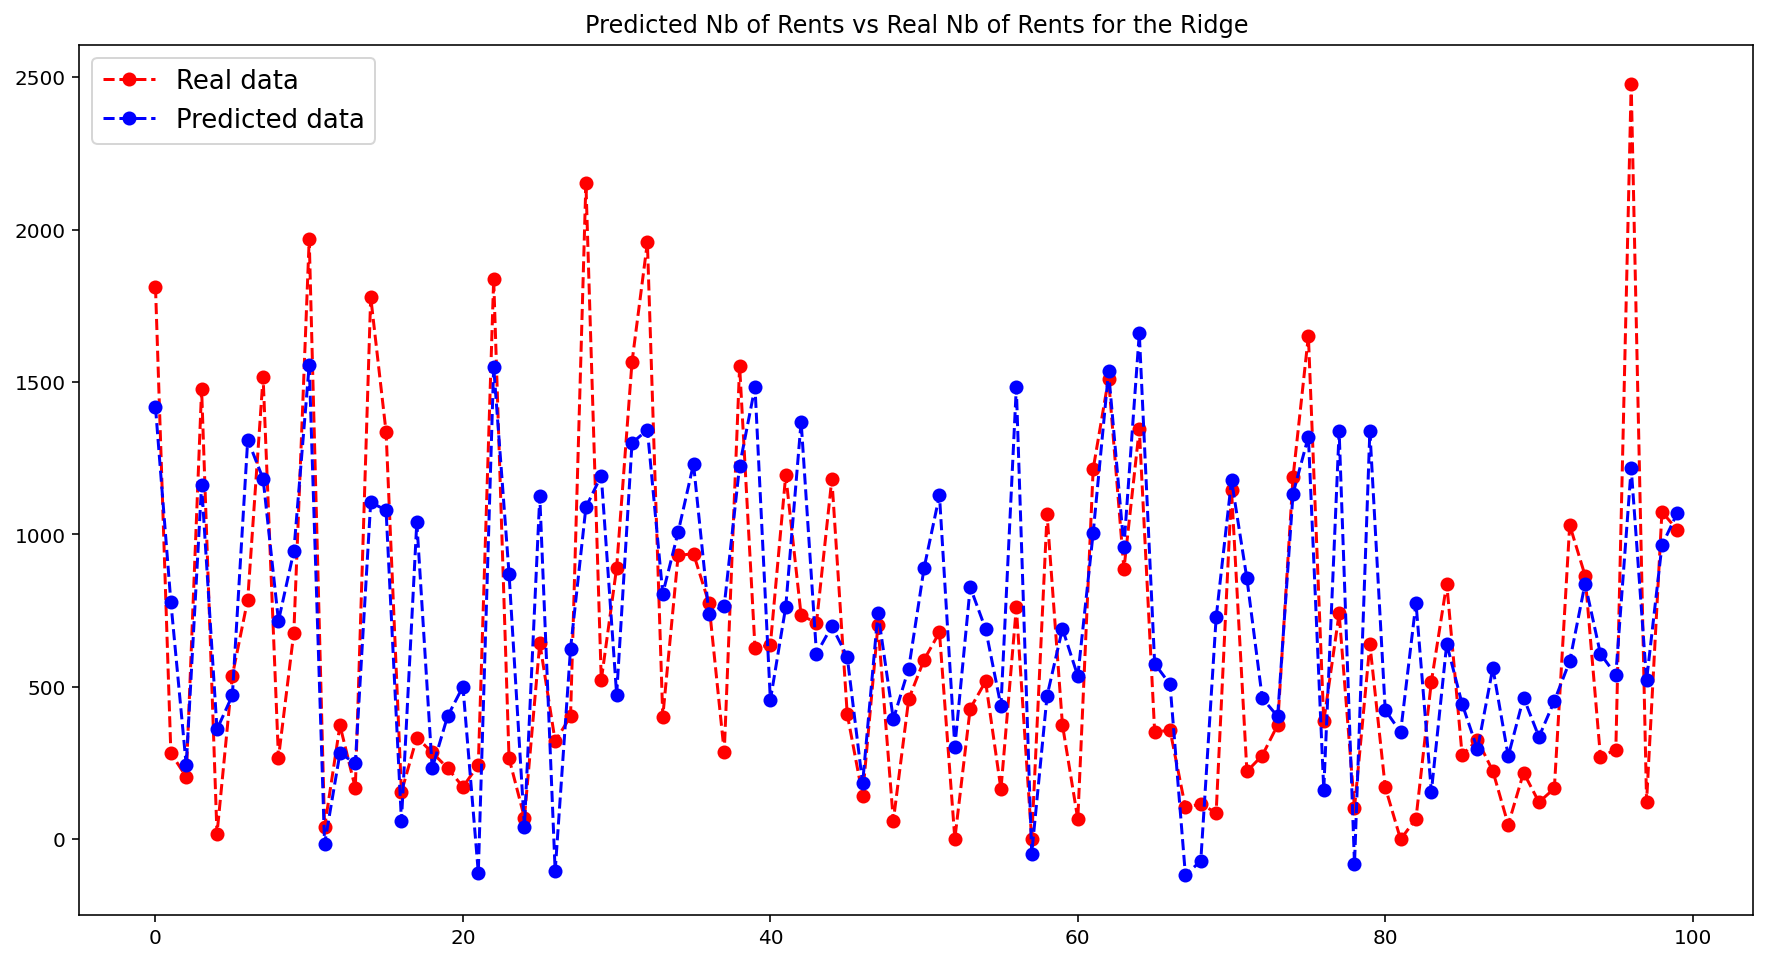

In [104]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_ridge[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.title('Predicted Nb of Rents vs Real Nb of Rents for the Ridge')
plt.legend(fontsize=13)
plt.show()

# Regression tree

It is one of the best method that we tried so far. This can be explained by the fact that Trees are always efficients on large datasets. 

- C'est pas bizarre d'obtenir 1 comme training score ? 

In [105]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [106]:
performance_list.append(['Regression Tree', reg_tree.score(x_train, y_train), reg_tree.score(x_test, y_test)])
print('Training score : {} \nTesting Score : {} \nDepth of the Tree : {} \nNumber of leaf : {}'.format(reg_tree.score(x_train, y_train), reg_tree.score(x_test, y_test), reg_tree.get_depth(), reg_tree.get_n_leaves()))

Training score : 1.0 
Testing Score : 0.7654221251436952 
Depth of the Tree : 31 
Number of leaf : 5634


In [107]:
y_pred_tree = reg_tree.predict(x_test)

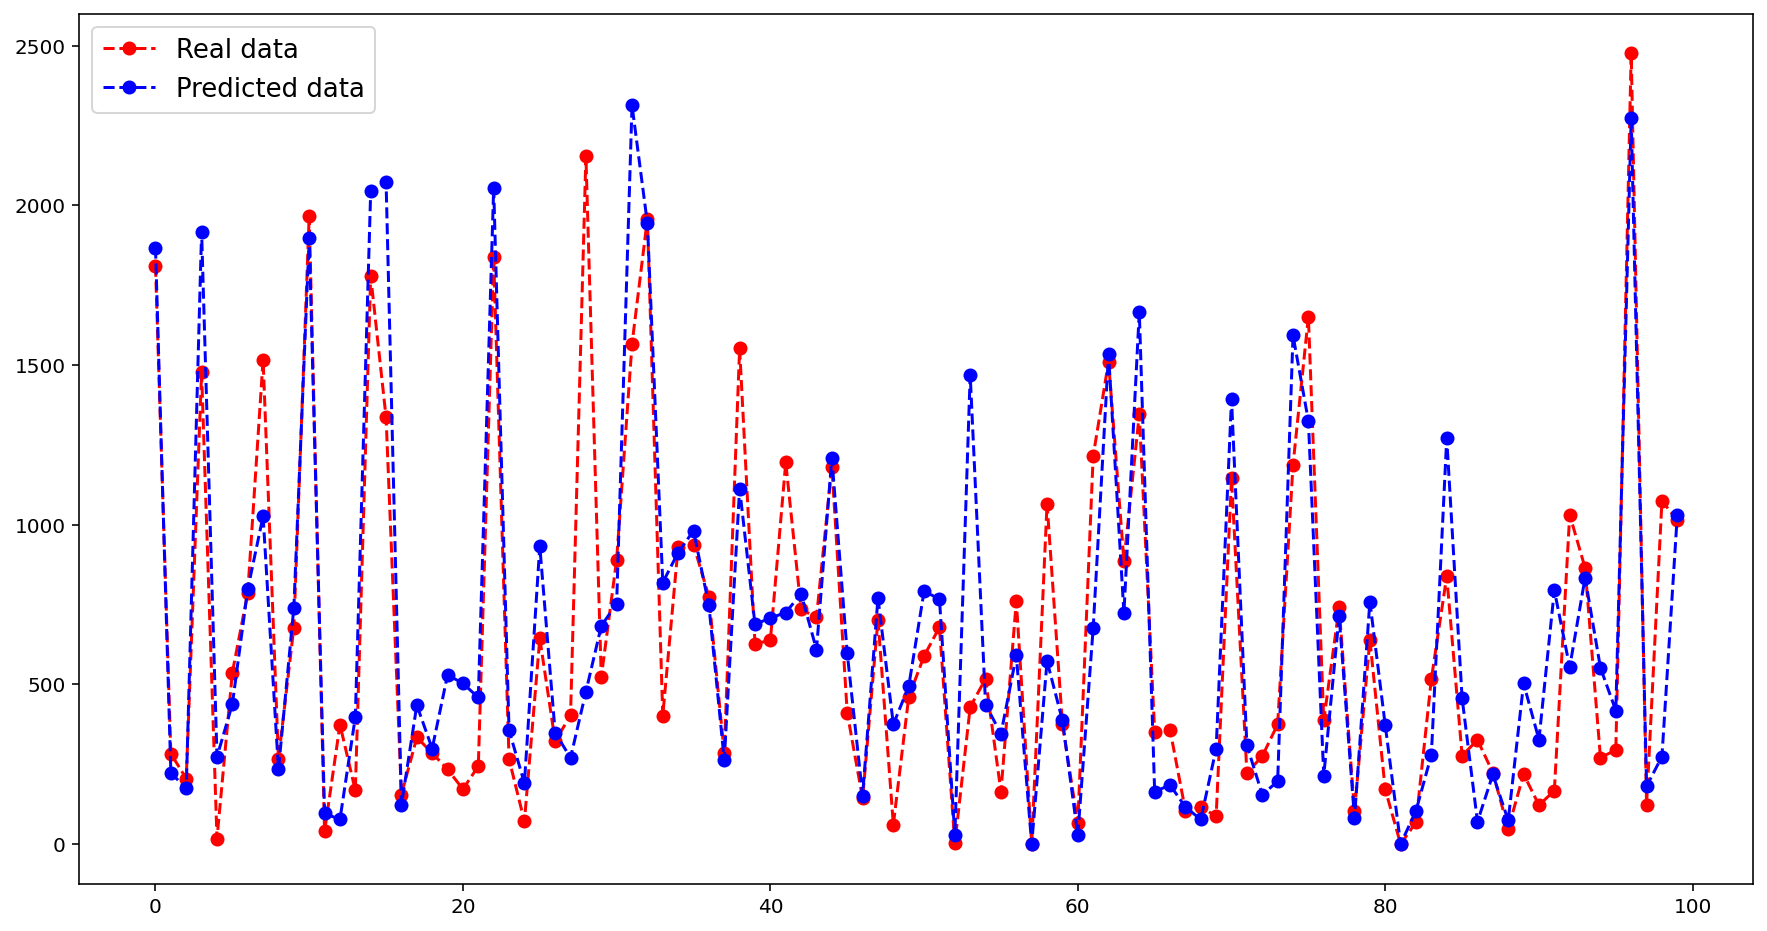

In [108]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_tree[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

# Random Forest regression

Best regression that we had so far taking a part 

In [109]:
reg_forest = RandomForestRegressor()
reg_forest.fit(x_train, y_train)

RandomForestRegressor()

In [116]:
performance_list.append(['Random Forest Regressor',reg_forest.score(x_train, y_train), reg_forest.score(x_test, y_test)])
rf_train_score, rf_test_score = reg_forest.score(x_train, y_train), reg_forest.score(x_test, y_test)
print('Training Score CV : {} \nTesting Score CV : {} \nNew parameters : {}'.format(rf_train_score, rf_test_score, reg_forest.get_params()))

Training Score CV : 0.9819152089387114 
Testing Score CV : 0.8714132957993687 
New parameters : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [111]:
y_pred_forest = reg_forest.predict(x_test)

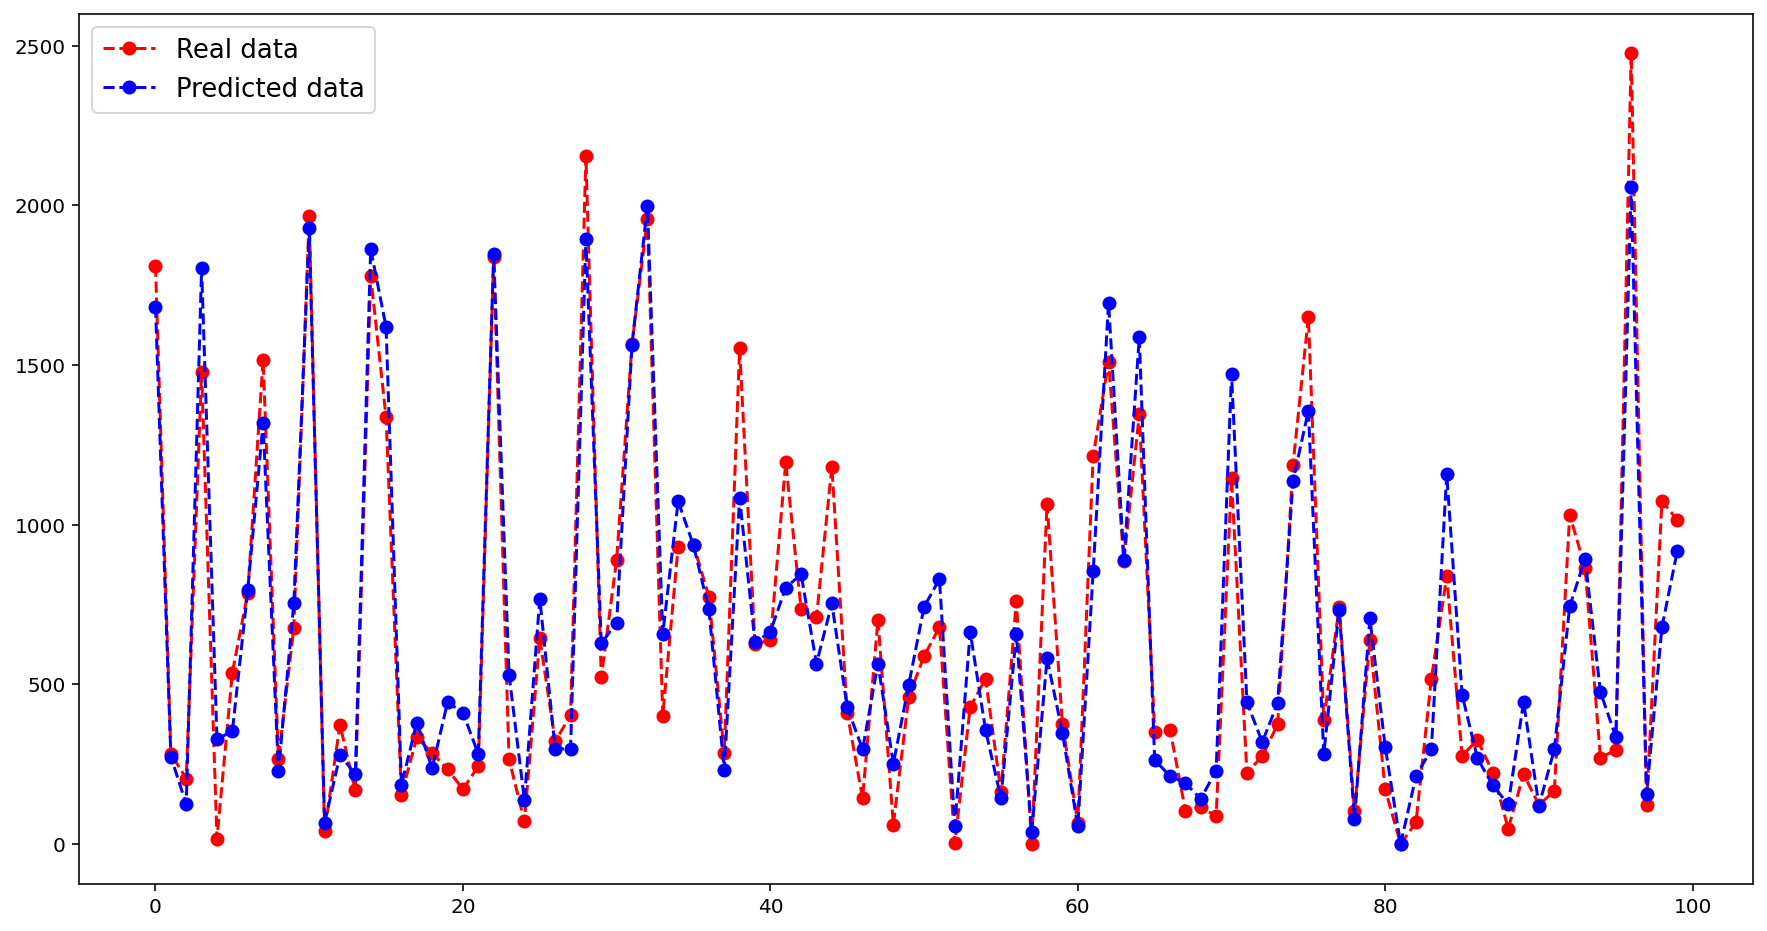

In [112]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_forest[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.show()

### Cross Validation 

The score we already got is good, but can we improve it ? 
To do so we create a parameters grid and we will apply this grid of parameters to the ```GridSearchCV```function of Sklearn.

In [113]:
%%time 

# Test 1 
tuned_parameters = {'min_samples_leaf' : np.arange(1,10)} # Augmentation sensible du score avec ça 
#param_grid = {'max_features': [2, 3],'min_samples_leaf': [1,2,3, 4, 5],'min_samples_split': [1,2,3,4]}
rf_cv = GridSearchCV(RandomForestRegressor(), tuned_parameters)

rf_cv.fit(x_train, y_train)

CPU times: user 1min 4s, sys: 503 ms, total: 1min 5s
Wall time: 1min 6s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [114]:
train_score_cv, test_score_cv  = rf_cv.score(x_train,y_train), rf_cv.score(x_test,y_test)
print('Training Score CV : {} \nTesting Score CV : {} \nNew parameters : {}'.format(train_score_cv, test_score_cv, rf_cv.best_params_))

Training Score CV : 0.9814832136210813 
Testing Score CV : 0.8705749014719222 
New parameters : {'min_samples_leaf': 1}


> On obtient un meilleur résultat sur le testing set mais un score un peu moins bon sur le training set avec le dictionnaire tuned_parameters

## Summary of the methods 
 
We used : 
- SVR 
- Ridge
- LASSO
- Random Tree
- Random Forest Regression

In [115]:
print('Method name || Training Score || Testing score ')
for i,j,k in performance_list:
    print('{} || {} || {} '.format(i,j,k))

Method name || Training Score || Testing score 
SVR || 0.732905371384871 || 0.7203680592051755 
Lasso || 0.5477061139687648 || 0.5374454449646758 
Ridge || 0.5477076101640762 || 0.5374636941897528 
Regression Tree || 1.0 || 0.7654221251436952 
Random Forest Regressor || 0.9819152089387114 || 0.8714132957993687 


- we can see that the algorithm that give the best score on the testing set is the ```RandomForestRegressor``` with an excellent score on the training set as well.

We get that the algorithm that we must keep in order to get the best predictive model is the Random Forest Regressor. We can compare it to the Neural Network that we'll study in the following part.

# Neural network

In [118]:
model = Sequential()

model.add(Dense(units = 128, activation='relu', input_dim=12))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [119]:
history = model.fit(x_train, y_train, batch_size = 25, epochs = 500, validation_data=(x_test, y_test), verbose=0)

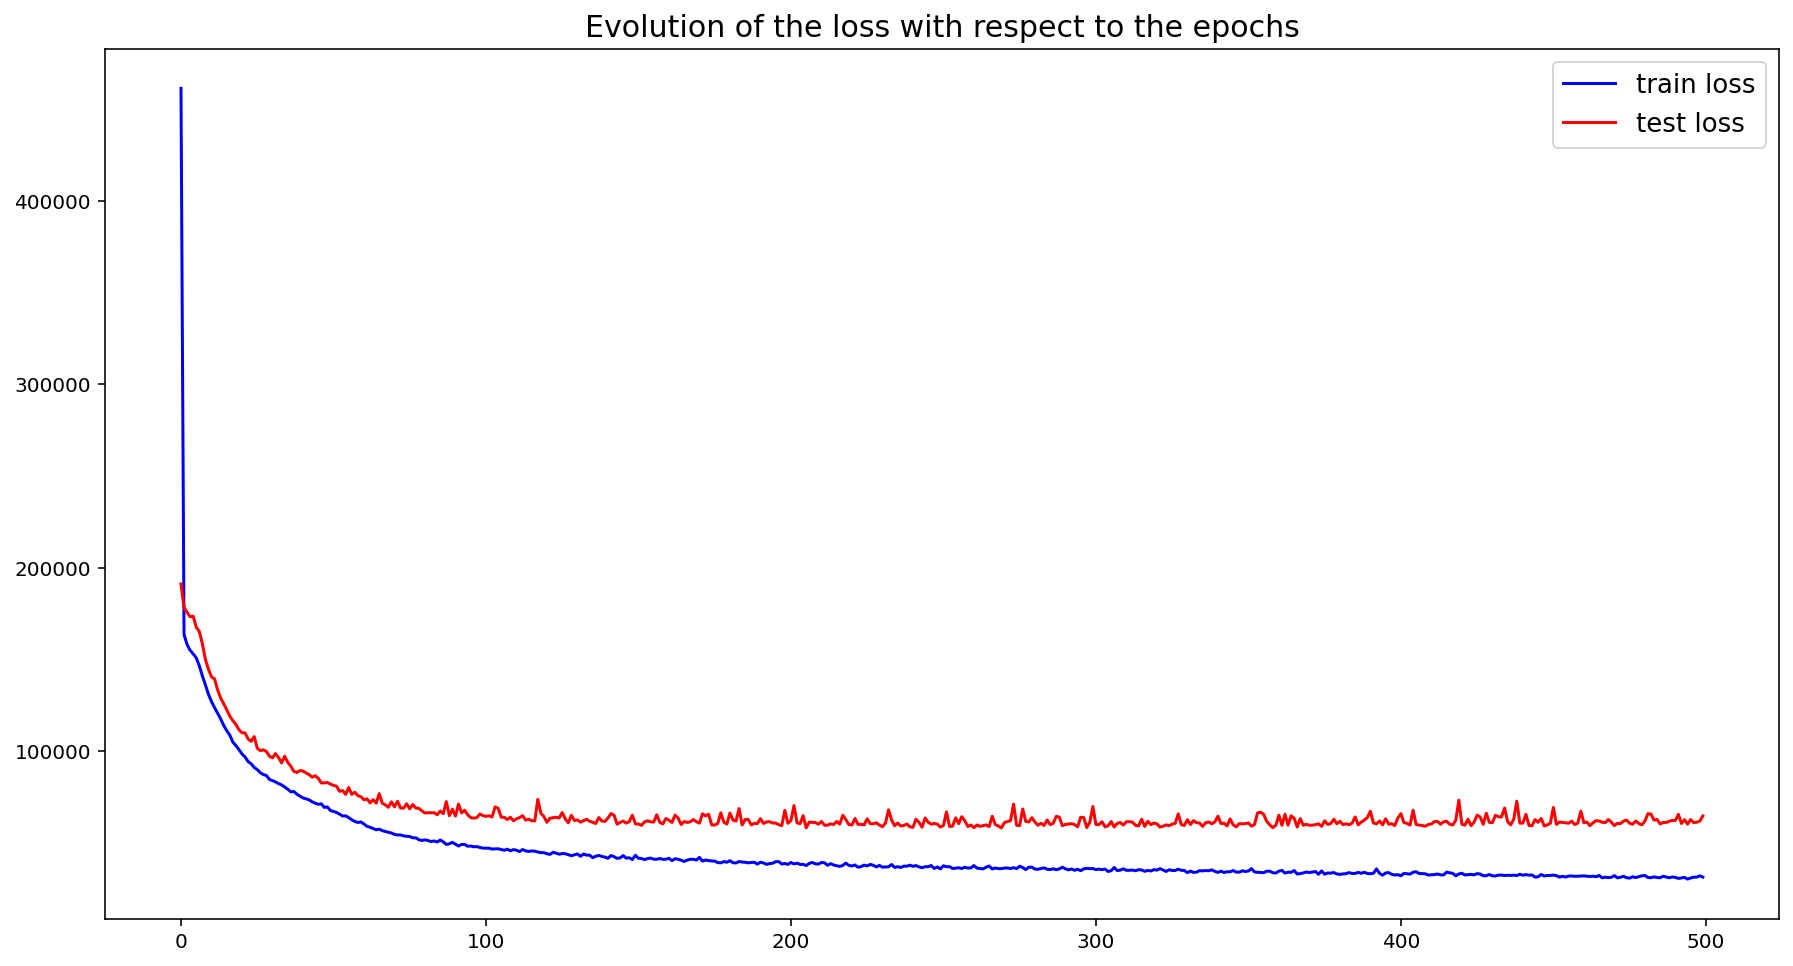

In [120]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,8))
plt.plot(loss, c='b', label='train loss')
plt.plot(val_loss, c='r', label='test loss')
plt.title('Evolution of the loss with respect to the epochs', size=15)
plt.legend(fontsize=13)
plt.show()

We can see that the loss rapidely converges when the number of epochs increases. 

In [121]:
y_pred_NN = model.predict(x_test)

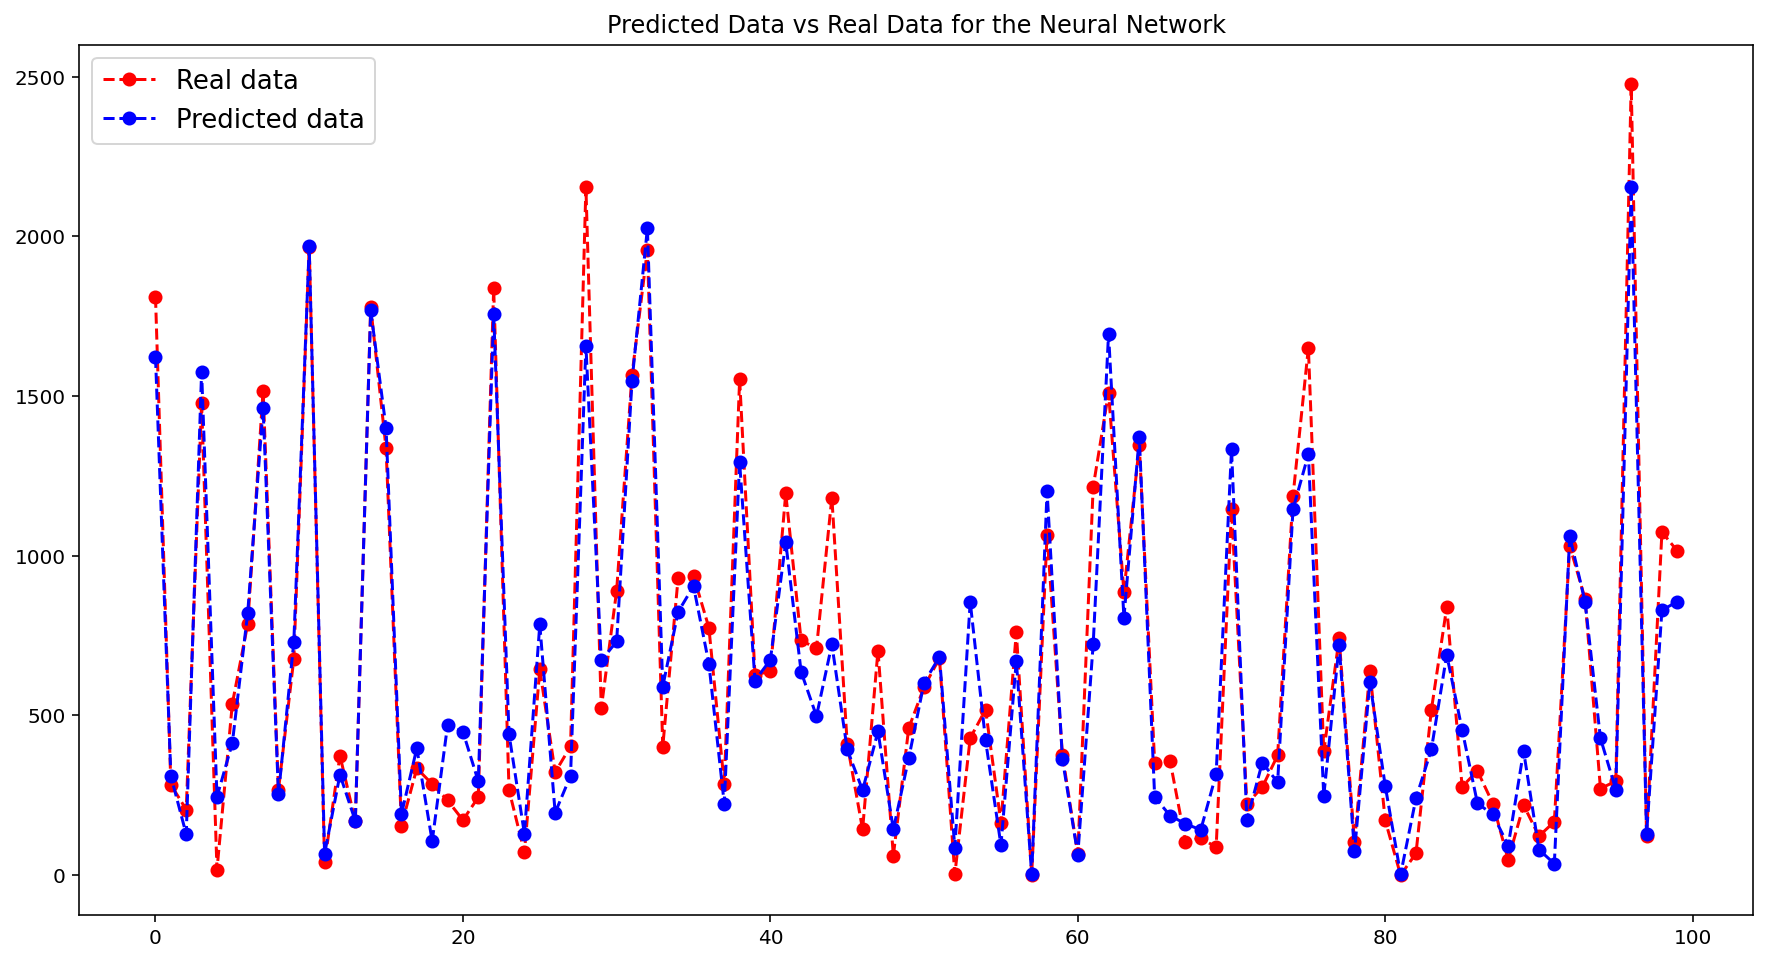

In [122]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values[100:200], color = 'r', marker='o', linestyle='--', label = 'Real data')
plt.plot(y_pred_NN[100:200], color = 'b', marker='o', linestyle='--', label = 'Predicted data')
plt.legend(fontsize=13)
plt.title('Predicted Data vs Real Data for the Neural Network')
plt.show()

In [123]:
model.evaluate(x_test, y_test), model.evaluate(x_train, y_train)

184/184 [==============================] - 0s 761us/step - loss: 30664.8164 - accuracy: 8.5193e-04


([64831.60546875, 0.001037703244946897],
 [30664.81640625, 0.0008519339025951922])

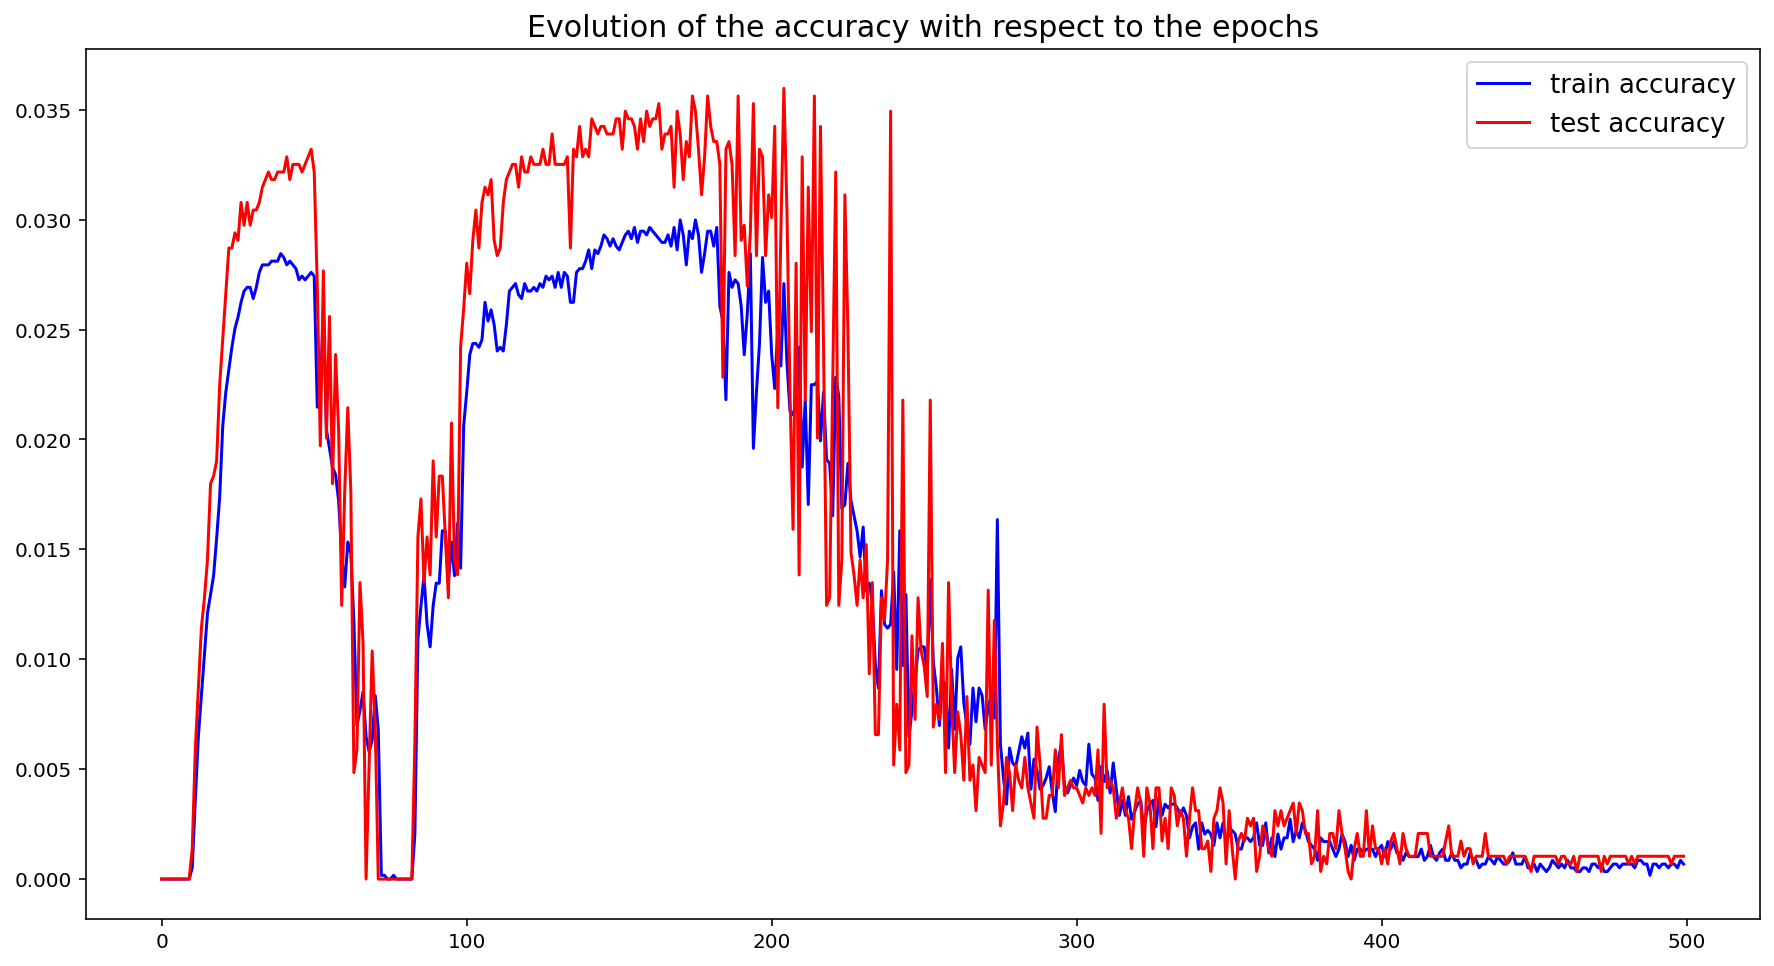

In [124]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.figure(figsize=(15,8))
plt.plot(loss, c='b',label='train accuracy')
plt.plot(val_loss, c='r',label='test accuracy')
plt.title('Evolution of the accuracy with respect to the epochs', size=15)
plt.legend(fontsize=13)
plt.show()

- L'accuracy est vraiment très mauvaise pour le réseaux de neurones. 

### Analyse réseau de neurones  : 

- On a une loss qui devient très vite très faible sur les testing et training set. 